## Web Scraping of AmbitionBox website

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
requests.get('https://www.ambitionbox.com/list-of-companies?page=1')

<Response [403]>

In [3]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}

In [4]:
webpage= requests.get('https://www.ambitionbox.com/list-of-companies?page=1', headers=headers).text

'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <title>List of companies - 790k companies | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2023 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com"><meta data-n-head="ssr" property="fb:app_id" content="712617688793459"><meta data-n-head="ssr" name="theme-color" content="#ffffff"><meta data-n-head="ssr" name="msapplication-navbutton-color" content="#ffffff"><meta data-n-head="ssr" name
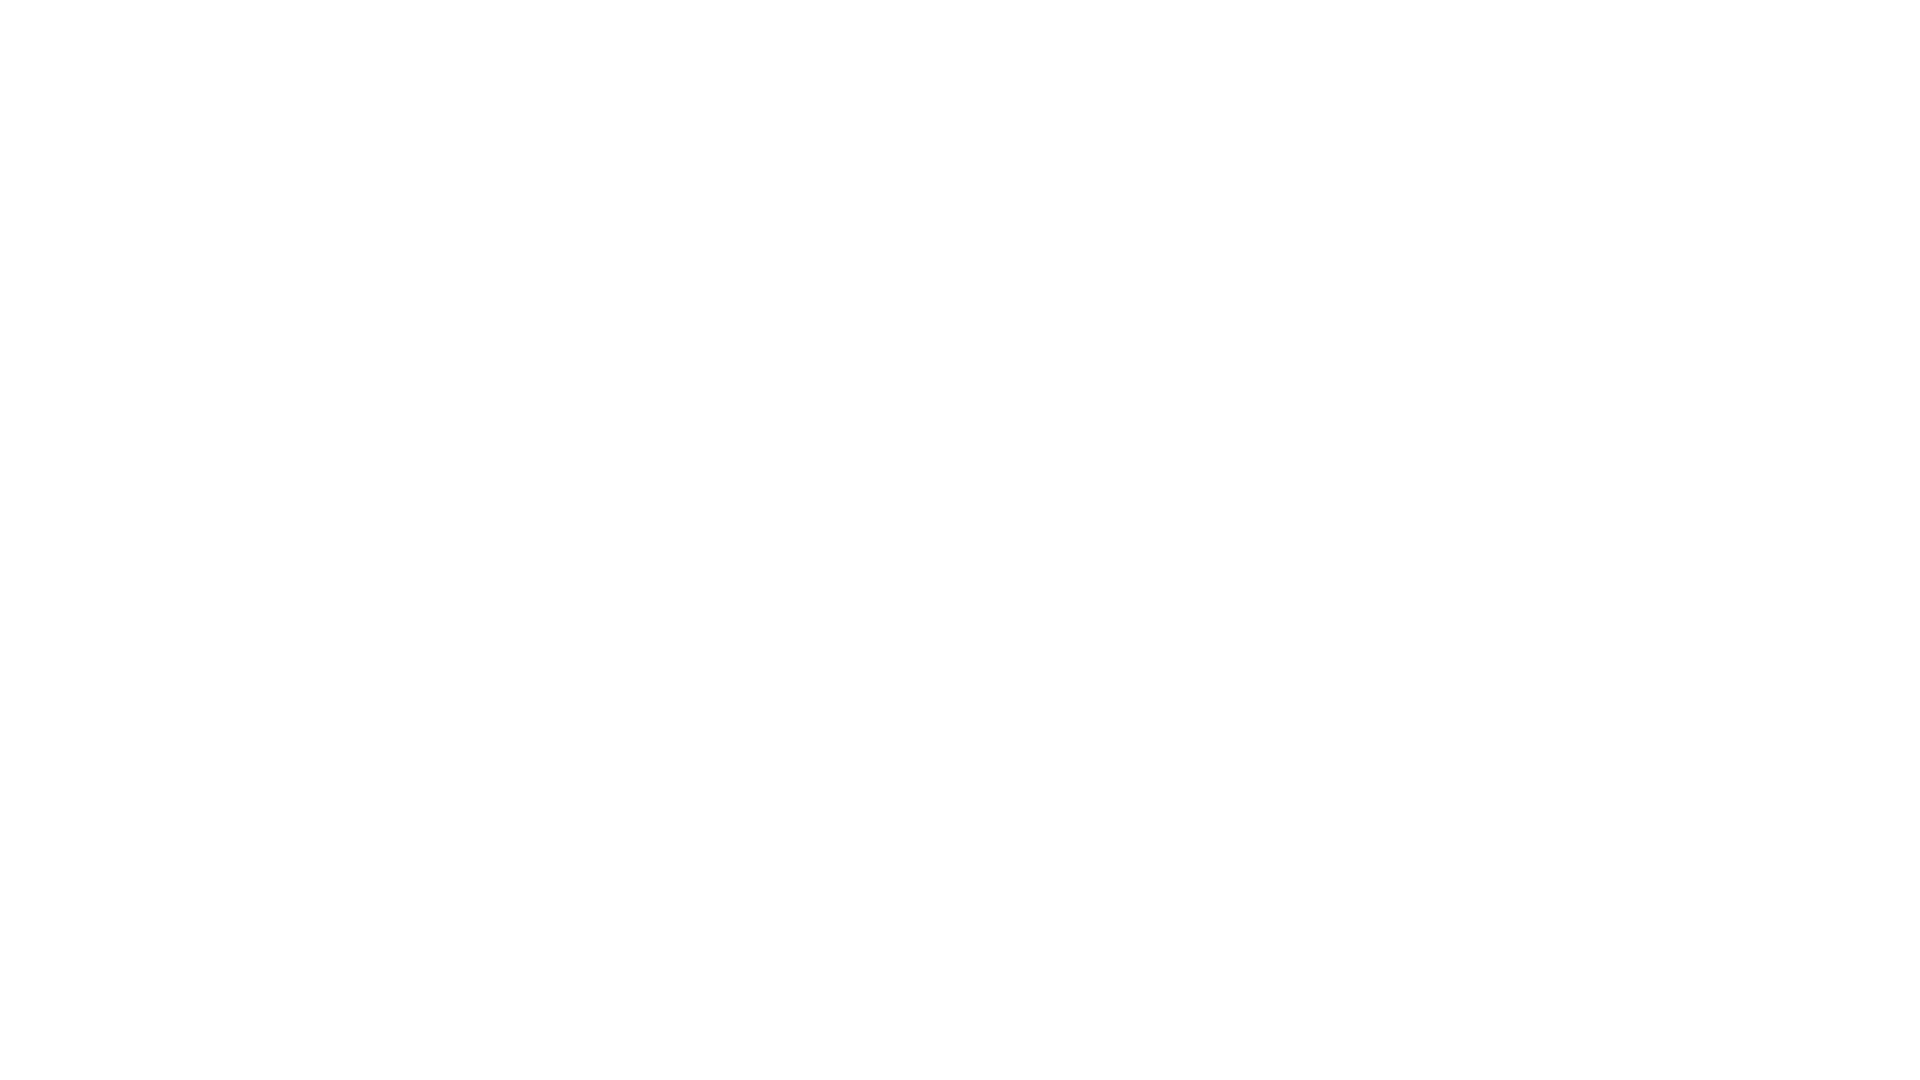

In [5]:
webpage

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>List of companies - 790k companies | AmbitionBox</title><meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"/><meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/><meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/><meta content="#ffffff" data-n-head="ssr" name="theme-color"/><meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/><meta content="default" data-n-head="ssr"
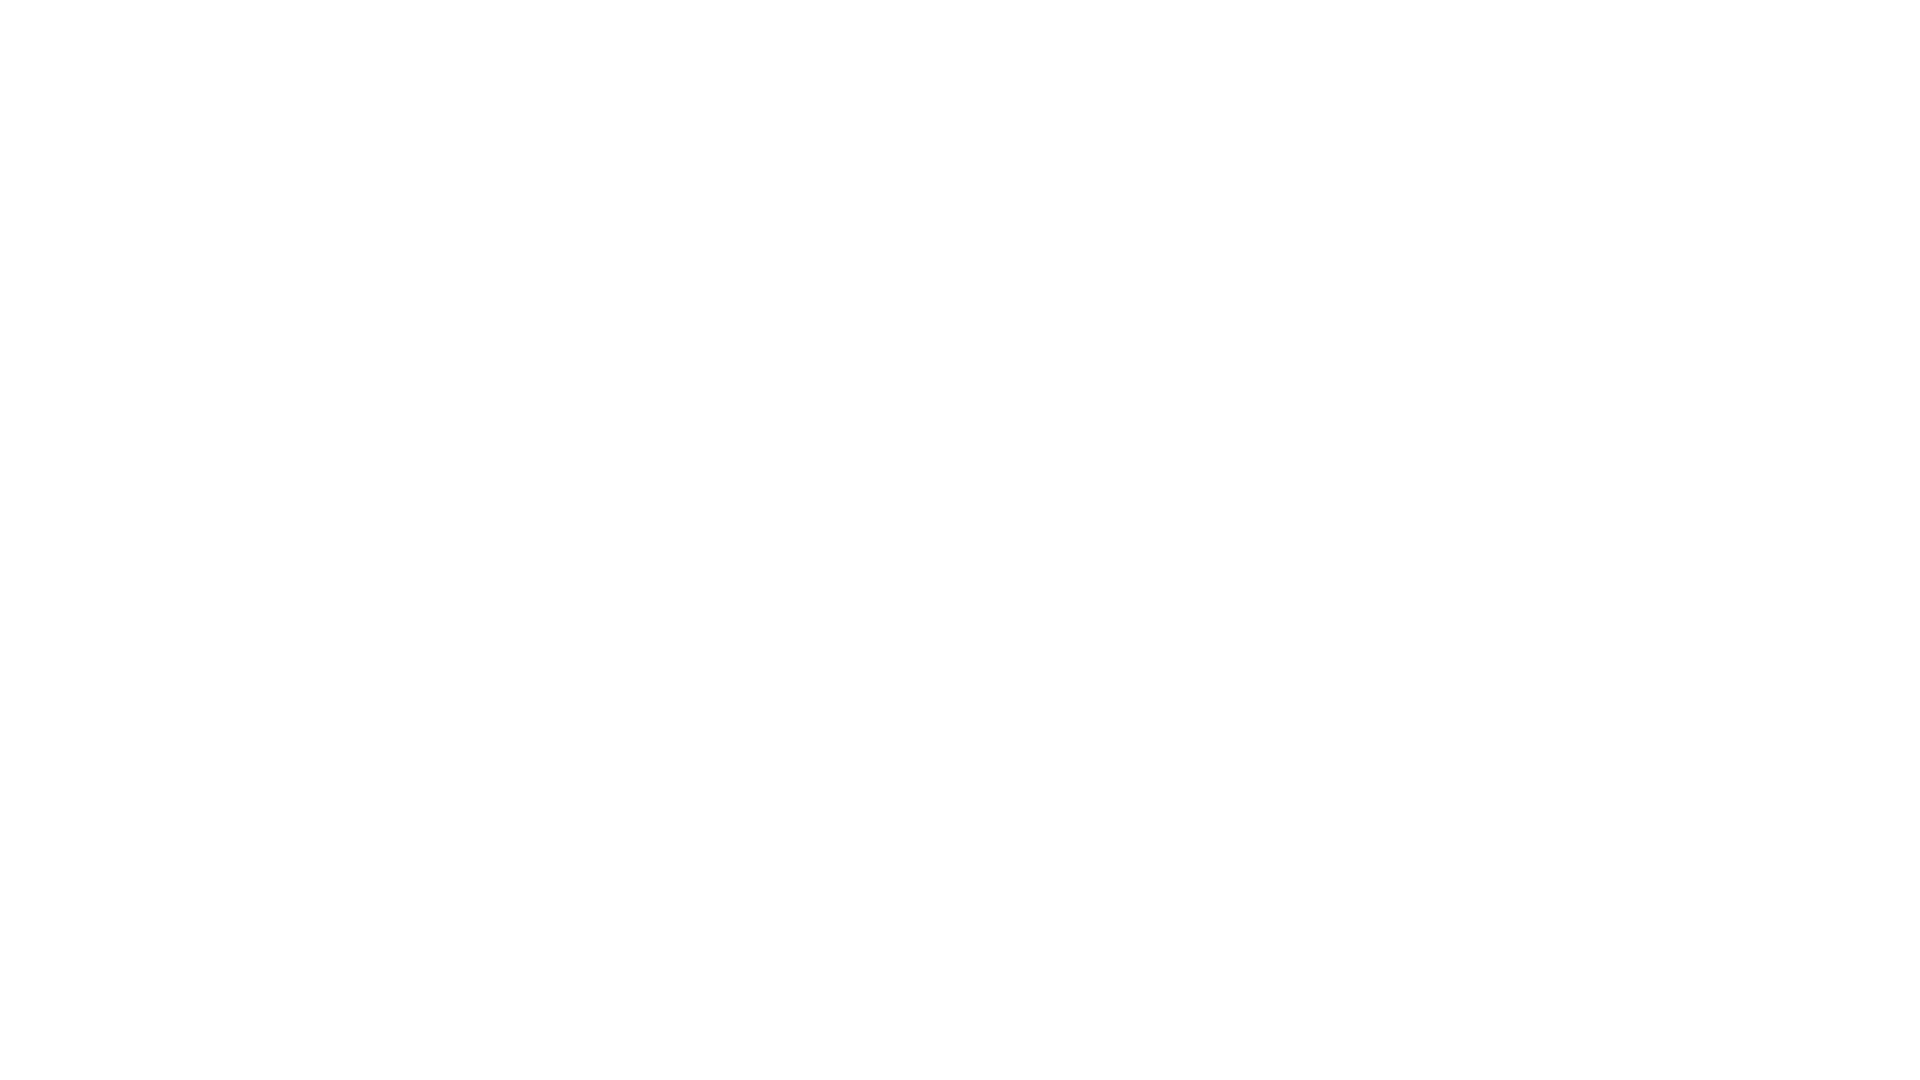

In [6]:
soup = BeautifulSoup(webpage, 'lxml')
soup

In [7]:
soup.find_all('h1')[0].text

'List of companies in India'

In [8]:
for i in soup.find_all('h2'):
    print(i.text.strip())

TCS
Accenture
Cognizant
ICICI Bank
HDFC Bank
Wipro
Infosys
Capgemini
Tech Mahindra
Genpact
HCLTech
Amazon
Axis Bank
Concentrix Corpo...
IBM
Reliance jio
Larsen & Toubro ...
HDB Financial Se...
Vodafone Idea
Teleperformance
Reliance Retail
Kotak Mahindra B...
Reliance Industr...
Deloitte
Bharti Airtel
BYJU'S
Tata Motors
Flipkart
WNS
IndusInd Bank


In [9]:
company = soup.find_all('div', class_ = 'company-content-wrapper')

In [10]:
company

[<div class="company-content-wrapper"><div class="company-content"><div class="company-logo"><img alt="Tata Consultancy Services logo" class="lazy" data-src="https://static.ambitionbox.com/assets/v2/images/rs:fit:200:200:false:false/bG9jYWw6Ly8vbG9nb3Mvb3JpZ2luYWxzL3Rjcy5qcGc.webp" height="100" onerror="this.onerror=null;this.src='/static/icons/company-placeholder.svg';" src="https://static.ambitionbox.com/static/icons/company-placeholder.svg" width="100"/></div> <div class="company-info-wrapper"><div class="company-info"><div class="left"><a href="/overview/tcs-overview"><h2 class="company-name bold-title-l" title="TCS">
 									TCS
 								</h2></a> <div class="rating-wrapper"><p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.9
 								</p> <a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/tcs-reviews">
 									(53.3k Reviews)
 								</a></div></div> <button class="ab_btn follow-btn invert round"><span class="ctas-

In [11]:
len(company)

30

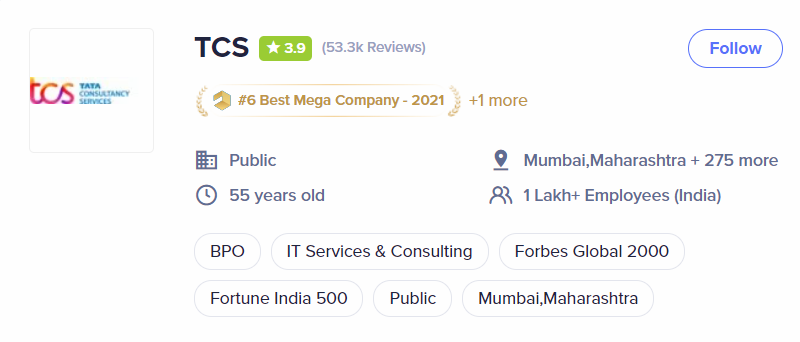

In [12]:
name = []
rating = []
reviews = []
type_of_comp = []
headquarter = []
how_old = []
no_of_emp = []


for i in company:
    name.append(i.find('h2').text.strip())
    rating.append(i.find('p', class_='rating').text.strip())
    reviews.append(i.find('a', class_='review-count').text.strip())
    type_of_comp.append(i.find_all('p', class_='infoEntity')[0].text.strip())
    headquarter.append(i.find_all('p', class_='infoEntity')[1].text.strip())
    how_old.append(i.find_all('p', class_='infoEntity')[2].text.strip())
    no_of_emp.append(i.find_all('p', class_='infoEntity')[3].text.strip())
    
df = pd.DataFrame({'Company Name': name, 'Company Rating' : rating, 'Company Reviews' : reviews,
                  'type_of_comp': type_of_comp, 'headquarter' : headquarter, 'how_old': how_old, 
                  'no_of_emp': no_of_emp})


In [13]:
df

,Company Name,Company Rating,Company Reviews,type_of_comp,headquarter,how_old,no_of_emp
0,TCS,3.9,(53.3k Reviews),Public,"Mumbai,Maharashtra + 275 more",55 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(33.8k Reviews),Public,Dublin + 133 more,34 years old,1 Lakh+ Employees (India)
2,Cognizant,4.0,(31.1k Reviews),Private,Teaneck. New Jersey. + 102 more,29 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(35k Reviews),Public,"Mumbai,Maharashtra + 1072 more",29 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(41.3k Reviews),Public,"Mumbai,Maharashtra + 1295 more",29 years old,50k-1 Lakh Employees (India)
5,Wipro,3.9,(30.4k Reviews),Public,"Bangalore/Bengaluru,Karnataka + 229 more",78 years old,1 Lakh+ Employees (India)
6,Infosys,3.9,(29.6k Reviews),Public,"Bengaluru/Bangalore,Karnataka + 127 more",42 years old,1 Lakh+ Employees (India)
7,Capgemini,3.9,(25.1k Reviews),Public,Paris + 79 more,56 years old,1 Lakh+ Employees (India)
8,Tech Mahindra,3.7,(22.6k Reviews),Public,"Pune,Maharashtra + 213 more",37 years old,50k-1 Lakh Employees (India)
9,Genpact,4.0,(20.3k Reviews),Public,"New York,New York + 69 more",26 years old,50k-1 Lakh Employees (India)


In [14]:
df.shape

(30, 7)

# Extract all details from all 333 pages 

In [15]:
final = pd.DataFrame()

for j in range(1,334):
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    url = requests.get('https://www.ambitionbox.com/list-of-companies?page={}'.format(j), headers=headers).text
    webpage= requests.get('https://www.ambitionbox.com/list-of-companies?page={}'.format(j), headers=headers).text
    soup = BeautifulSoup(webpage, 'lxml')
    company = soup.find_all('div', class_ = 'company-content-wrapper')
    
    name = []
    rating = []
    reviews = []
    type_of_comp = []
    headquarter = []
    how_old = []
    no_of_emp = []
    
    for i in company:
        try:
            name.append(i.find('h2').text.strip())
        except:
            name.append(np.nan)
        try:
            rating.append(i.find('p', class_='rating').text.strip())
        except:
            rating.append(np.nan)
        try:
            reviews.append(i.find('a', class_='review-count').text.strip())
        except:
            reviews.append(np.nan)
        try:
            type_of_comp.append(i.find_all('p', class_='infoEntity')[0].text.strip())
        except:
            type_of_comp.append(np.nan)
        try:
            headquarter.append(i.find_all('p', class_='infoEntity')[1].text.strip())
        except:
            headquarter.append(np.nan)
        try:
            how_old.append(i.find_all('p', class_='infoEntity')[2].text.strip())
        except:
            how_old.append(np.nan)
        try:
            no_of_emp.append(i.find_all('p', class_='infoEntity')[3].text.strip())
        except:
            no_of_emp.append(np.nan)
            
    df = pd.DataFrame({'Company Name': name, 'Company Rating' : rating, 'Company Reviews' : reviews,
                  'type_of_comp': type_of_comp, 'headquarter' : headquarter, 'how_old': how_old, 
                  'no_of_emp': no_of_emp})
    
    final = final.append(df, ignore_index=True)         

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19552\825628277.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(df, ignore_index=True)


In [16]:
final.tail()

,Company Name,Company Rating,Company Reviews,type_of_comp,headquarter,how_old,no_of_emp
9979,St. Andrews Inst...,4.5,(53 Reviews),Gurgaon/Gurugram + 2 more,11-50 Employees (India),NaN,NaN
9980,Sarla Advantech,4.1,(53 Reviews),Private,"Navi Mumbai,Maharashtra + 5 more",24 years old,201-500 Employees (India)
9981,Pathways Schools,4.4,(53 Reviews),Gurgaon/Gurugram + 2 more,NaN,NaN,NaN
9982,Vega Industries,4.1,(53 Reviews),Private,"Noida,Uttar Pradesh + 9 more",23 years old,501-1k Employees (India)
9983,Tahal Group,4.3,(53 Reviews),Or Yehuda + 7 more,71 years old,501-1k Employees (Global),NaN


In [17]:
final.shape

(9984, 7)